In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
def load_all_results(results_dir='results/population'):
    results = []
    for filename in os.listdir(results_dir):
        if filename.startswith('history_experiment_') and filename.endswith('.json'):
            filepath = os.path.join(results_dir, filename)
            with open(filepath, 'r') as f:
                history = json.load(f)
            results.append(history)
    return results


In [56]:
def process_results(results):
    best_fitness_list = []
    history_list = []
    
    for result in results:
        # Extrair informações de melhor fitness
        best_fitness_list.append({
            'experiment_id': result['experiment_id'],
            'repetition': result['repetition'],
            'best_train_v_measure': result['best_train_v_measure'],
            'best_test_v_measure': result['best_test_v_measure'],
            'best_individual': result['best_individual'],
            "count_better": result['count_better'],
            "count_worse": result['count_worse'],
            'config': result['config']
        })
        
        # Criar uma tupla ordenada da configuração excluindo 'experiment_id' e 'repetition'
        config_items = [(k, v) for k, v in result['config'].items() if k not in ['repetition']]
        config_tuple = tuple(sorted(config_items))
        
        # Adicionar ao histórico com identificação
        for generation_data in result['history']:
            history_record = generation_data.copy()
            history_record['experiment_id'] = result['experiment_id']
            history_record['repetition'] = result['repetition']
            history_record['config'] = result['config']
            history_record['count_better'] = result['count_better']
            history_record['count_worse'] = result['count_worse']
            history_list.append(history_record)
    
    # Criar DataFrames
    df_best_fitness = pd.DataFrame(best_fitness_list)
    df_history = pd.DataFrame(history_list)
    
    return df_best_fitness, df_history


# Population Results

In [58]:
# Carregar todos os resultados
results = load_all_results('results/population')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_history.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse
0,0,0.096061,0.000011,0.012730,0.016600,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379
1,1,0.096061,0.000122,0.019998,0.022211,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379
2,2,0.096061,0.000012,0.018583,0.020788,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379
3,3,0.096061,0.000012,0.019983,0.020748,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379
4,4,0.096061,0.000033,0.026380,0.024694,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379


In [59]:
df_history['population_size'] = df_history['config'].apply(lambda x: x['population_size'])
df_history['num_generations'] = df_history['config'].apply(lambda x: x['num_generations'])
df_history.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse,population_size,num_generations
0,0,0.096061,0.000011,0.012730,0.016600,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379,100,50
1,1,0.096061,0.000122,0.019998,0.022211,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379,100,50
2,2,0.096061,0.000012,0.018583,0.020788,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379,100,50
3,3,0.096061,0.000012,0.019983,0.020748,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379,100,50
4,4,0.096061,0.000033,0.026380,0.024694,0.068765,10,0,"{'population_size': 100, 'num_generations': 50...",2097,2379,100,50


In [74]:
table_results = df_history.groupby(['population_size', 'num_generations']).agg({
    'best_fitness': ['max','mean','std'],
    'test_fitness': 'mean'
}).reset_index().set_index(['population_size', 'num_generations'])

table_results = table_results.round(2).rename(columns={
    'best_fitness': 'best_train_fitness'
})

display(table_results.style.background_gradient(cmap='viridis', axis=0).format("{:.2f}"))

In [75]:
df_best = df_history[(df_history['num_generations']==100 )& (df_history['population_size']==250)].reset_index(drop=True)
df_best.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse,population_size,num_generations
3800,0,0.086140,6.232449e-16,0.011051,0.014534,8.784053e-03,15,0,"{'population_size': 250, 'num_generations': 10...",9977,12523,250,100
3801,1,0.086870,3.143036e-06,0.014017,0.017689,9.063201e-16,15,0,"{'population_size': 250, 'num_generations': 10...",9977,12523,250,100
3802,2,0.123801,2.723947e-06,0.019148,0.021352,2.994460e-02,15,0,"{'population_size': 250, 'num_generations': 10...",9977,12523,250,100
3803,3,0.123801,0.000000e+00,0.021653,0.022920,2.994460e-02,15,0,"{'population_size': 250, 'num_generations': 10...",9977,12523,250,100
3804,4,0.123801,2.723947e-06,0.020187,0.020378,2.994460e-02,15,0,"{'population_size': 250, 'num_generations': 10...",9977,12523,250,100


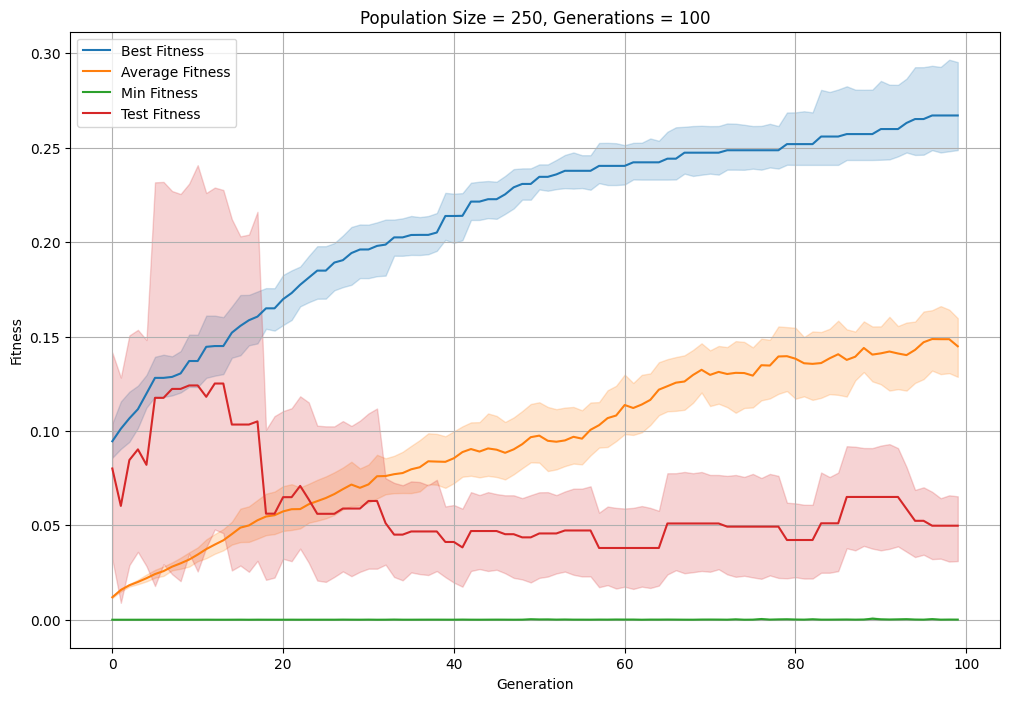

In [78]:
plt.figure(figsize=(12, 8))

# Plot Best Fitness
sns.lineplot(data=df_best, x='generation', y='best_fitness', label='Best Fitness', )

# Plot Average Fitness
sns.lineplot(data=df_best, x='generation', y='average_fitness', label='Average Fitness')

# Plot Min Fitness
sns.lineplot(data=df_best, x='generation', y='min_fitness', label='Min Fitness')

# Plot Test Fitness
sns.lineplot(data=df_best, x='generation', y='test_fitness', label='Test Fitness')

# Configure the plot
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Population Size = 250, Generations = 100')
plt.legend()
plt.grid(True)
plt.show()

# Operators Probability

In [80]:
# Carregar todos os resultados
results = load_all_results('results/operators')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_history.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse
0,0,0.102402,0.000000e+00,0.010878,0.014932,0.230885,1,0,"{'population_size': 250, 'num_generations': 10...",12159,10473
1,1,0.102402,6.232449e-16,0.015786,0.020847,0.230885,1,0,"{'population_size': 250, 'num_generations': 10...",12159,10473
2,2,0.102402,1.356958e-05,0.016682,0.018953,0.230885,1,0,"{'population_size': 250, 'num_generations': 10...",12159,10473
3,3,0.102402,2.723947e-06,0.019476,0.020971,0.230885,1,0,"{'population_size': 250, 'num_generations': 10...",12159,10473
4,4,0.130448,6.232449e-16,0.021758,0.024946,0.125625,1,0,"{'population_size': 250, 'num_generations': 10...",12159,10473


In [100]:
df_history['crossover_prob'] = df_history['config'].apply(lambda x: x['crossover_prob'])
df_history['mutation_prob'] = df_history['config'].apply(lambda x: x['mutation_prob'])

table_results = df_history.groupby(['crossover_prob', 'mutation_prob']).agg({
    'best_fitness': ['max','mean','std'],
    'test_fitness': 'mean'
}).reset_index().set_index(['crossover_prob', 'mutation_prob'])

table_results = table_results.round(2).rename(columns={
    'best_fitness': 'best_train_fitness'
})

display(table_results.style.background_gradient(cmap='viridis', axis=0).format("{:.2f}").format_index("{:.2f}"))

In [102]:
df_grouped = df_history.groupby(['crossover_prob', 'mutation_prob']).agg({'count_better': 'mean', 'count_worse': 'mean'}).reset_index()

df_grouped['percentage_better'] = df_grouped['count_better'] / (df_grouped['count_better'] + df_grouped['count_worse']) * 100
df_grouped['percentage_worse'] = df_grouped['count_worse'] / (df_grouped['count_better'] + df_grouped['count_worse']) * 100

df_grouped['percentage_better'] = df_grouped['percentage_better'].round(2).astype(str) + '%'
df_grouped['percentage_worse'] = df_grouped['percentage_worse'].round(2).astype(str) + '%'

df_grouped = df_grouped.set_index(['crossover_prob', 'mutation_prob'])
display(df_grouped.style.format_index("{:.2f}").format("{:.2f}", subset=['count_better', 'count_worse']))

,,count_better,count_worse,percentage_better,percentage_worse
crossover_prob,mutation_prob,,,,
0.60,0.30,9573.80,5414.60,63.87%,36.13%
0.90,0.05,12918.50,9572.50,57.44%,42.56%


In [103]:
df_best = df_history[(df_history['crossover_prob']==0.6 )& (df_history['mutation_prob']==0.3)].reset_index(drop=True)
df_best.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse,crossover_prob,mutation_prob
1000,0,0.080146,0.000000e+00,0.012226,0.015204,0.046018,2,0,"{'population_size': 250, 'num_generations': 10...",9497,5607,0.6,0.3
1001,1,0.107705,5.514778e-06,0.018150,0.018646,0.285742,2,0,"{'population_size': 250, 'num_generations': 10...",9497,5607,0.6,0.3
1002,2,0.107705,6.232449e-16,0.020784,0.020551,0.285742,2,0,"{'population_size': 250, 'num_generations': 10...",9497,5607,0.6,0.3
1003,3,0.107705,0.000000e+00,0.020889,0.020448,0.285742,2,0,"{'population_size': 250, 'num_generations': 10...",9497,5607,0.6,0.3
1004,4,0.107705,5.514778e-06,0.023414,0.023651,0.285742,2,0,"{'population_size': 250, 'num_generations': 10...",9497,5607,0.6,0.3


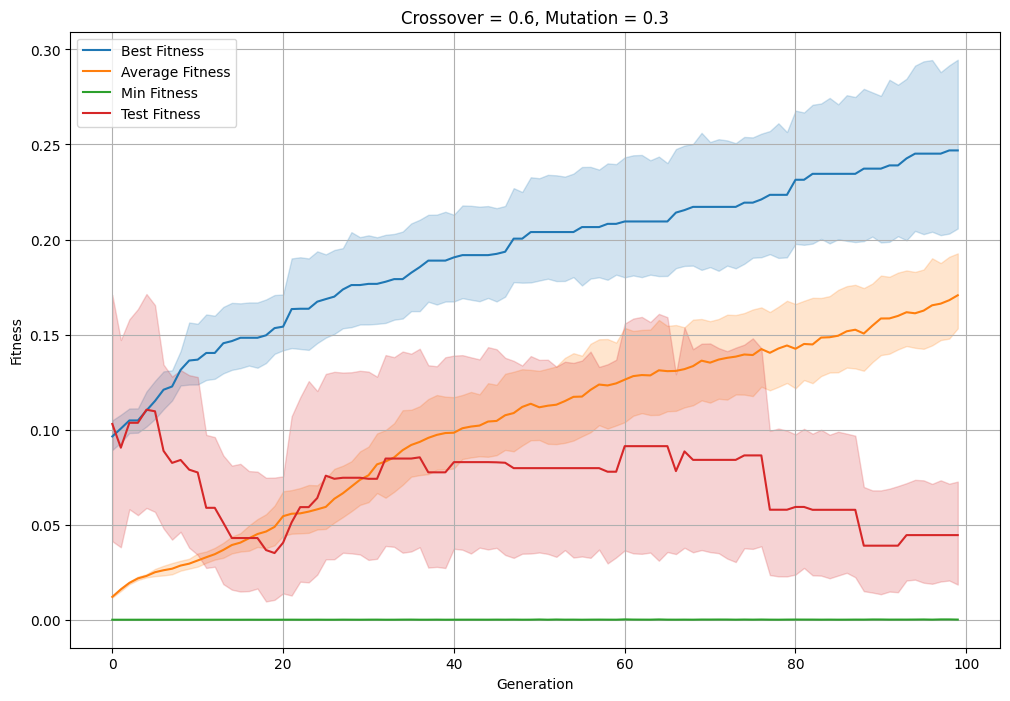

In [104]:
plt.figure(figsize=(12, 8))

# Plot Best Fitness
sns.lineplot(data=df_best, x='generation', y='best_fitness', label='Best Fitness', )

# Plot Average Fitness
sns.lineplot(data=df_best, x='generation', y='average_fitness', label='Average Fitness')

# Plot Min Fitness
sns.lineplot(data=df_best, x='generation', y='min_fitness', label='Min Fitness')

# Plot Test Fitness
sns.lineplot(data=df_best, x='generation', y='test_fitness', label='Test Fitness')

# Configure the plot
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Crossover = 0.6, Mutation = 0.3')
plt.legend()
plt.grid(True)
plt.show()

# Selection

In [105]:
# Carregar todos os resultados
results = load_all_results('results/selection')

# Processar os resultados
df_best_fitness, df_history = process_results(results)
df_history.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse
0,0,0.107439,6.232449e-16,0.011935,0.016641,0.006497,1,0,"{'population_size': 250, 'num_generations': 10...",11424,3608
1,1,0.107439,2.723947e-06,0.014860,0.017459,0.006497,1,0,"{'population_size': 250, 'num_generations': 10...",11424,3608
2,2,0.107439,5.514778e-06,0.017079,0.018513,0.006497,1,0,"{'population_size': 250, 'num_generations': 10...",11424,3608
3,3,0.107439,2.723947e-06,0.020610,0.018565,0.006497,1,0,"{'population_size': 250, 'num_generations': 10...",11424,3608
4,4,0.107439,0.000000e+00,0.025356,0.021097,0.006497,1,0,"{'population_size': 250, 'num_generations': 10...",11424,3608


In [106]:
df_history['config'][0]

{'population_size': 250,
 'num_generations': 100,
 'crossover_prob': 0.6,
 'mutation_prob': 0.3,
 'tournament_size': 2,
 'experiment_id': 1,
 'repetition': 0}

In [108]:
df_history['tournament_size'] = df_history['config'].apply(lambda x: x['tournament_size'])

table_results = df_history.groupby(['tournament_size']).agg({
    'best_fitness': ['max','mean','std'],
    'test_fitness': 'mean'
}).reset_index().set_index(['tournament_size'])

table_results = table_results.round(2).rename(columns={
    'best_fitness': 'best_train_fitness'
})

display(table_results.style.background_gradient(cmap='viridis', axis=0).format("{:.2f}"))

In [110]:
df_grouped = df_history.groupby(['tournament_size']).agg({'count_better': 'mean', 'count_worse': 'mean'}).reset_index()

df_grouped['percentage_better'] = df_grouped['count_better'] / (df_grouped['count_better'] + df_grouped['count_worse']) * 100
df_grouped['percentage_worse'] = df_grouped['count_worse'] / (df_grouped['count_better'] + df_grouped['count_worse']) * 100

df_grouped['percentage_better'] = df_grouped['percentage_better'].round(2).astype(str) + '%'
df_grouped['percentage_worse'] = df_grouped['percentage_worse'].round(2).astype(str) + '%'

df_grouped = df_grouped.set_index(['tournament_size'])
display(df_grouped.style.format_index("{:.2f}").format("{:.2f}", subset=['count_better', 'count_worse']))

,count_better,count_worse,percentage_better,percentage_worse
tournament_size,,,,
2.00,9561.20,5445.00,63.71%,36.29%
3.00,8146.40,6795.80,54.52%,45.48%
5.00,7617.22,7418.11,50.66%,49.34%
7.00,8391.89,6692.33,55.63%,44.37%


In [112]:
df_best = df_history[(df_history['tournament_size']==5)].reset_index(drop=True)
df_best.head()

,generation,best_fitness,min_fitness,average_fitness,std_fitness,test_fitness,experiment_id,repetition,config,count_better,count_worse,tournament_size
0,0,0.102402,6.232449e-16,0.012259,0.017325,0.230885,3,0,"{'population_size': 250, 'num_generations': 10...",5943,9083,5
1,1,0.110236,5.514778e-06,0.023473,0.023315,0.029945,3,0,"{'population_size': 250, 'num_generations': 10...",5943,9083,5
2,2,0.163896,2.723947e-06,0.031070,0.029510,0.068765,3,0,"{'population_size': 250, 'num_generations': 10...",5943,9083,5
3,3,0.163896,2.723947e-06,0.041660,0.037305,0.068765,3,0,"{'population_size': 250, 'num_generations': 10...",5943,9083,5
4,4,0.175013,6.232449e-16,0.047827,0.044804,0.068765,3,0,"{'population_size': 250, 'num_generations': 10...",5943,9083,5


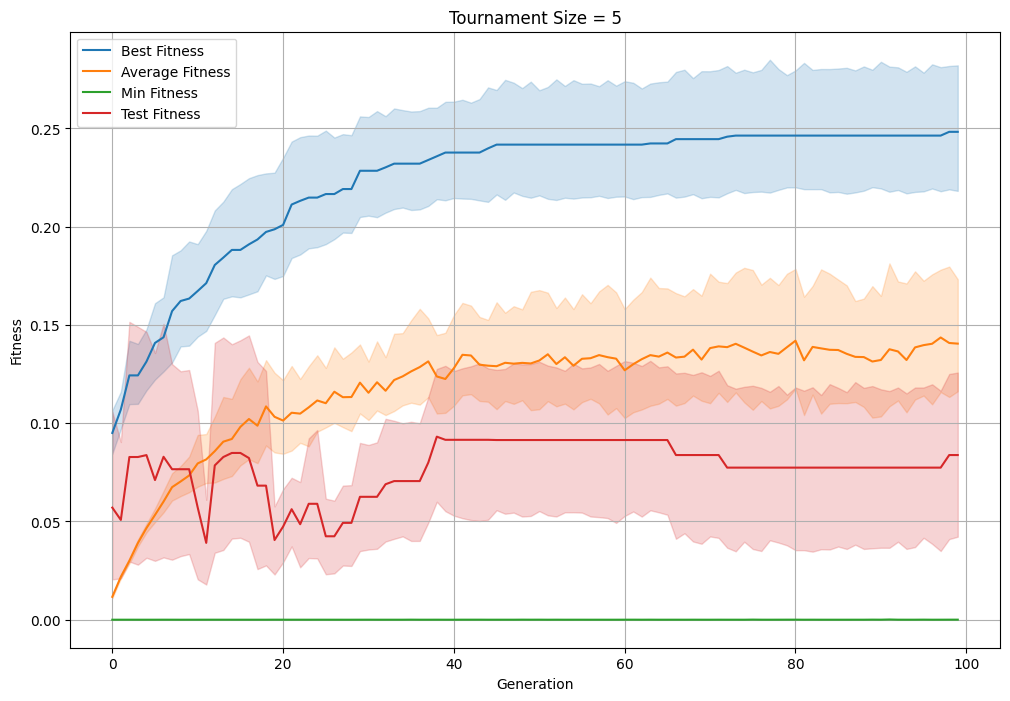

In [114]:
plt.figure(figsize=(12, 8))

# Plot Best Fitness
sns.lineplot(data=df_best, x='generation', y='best_fitness', label='Best Fitness', )

# Plot Average Fitness
sns.lineplot(data=df_best, x='generation', y='average_fitness', label='Average Fitness')

# Plot Min Fitness
sns.lineplot(data=df_best, x='generation', y='min_fitness', label='Min Fitness')

# Plot Test Fitness
sns.lineplot(data=df_best, x='generation', y='test_fitness', label='Test Fitness')

# Configure the plot
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Tournament Size = 5')
plt.legend()
plt.grid(True)
plt.show()